In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import pandas as pd

csv_data = pd.read_csv('Regression.csv')

npArray = csv_data.to_numpy()

npArray

array([[ -5.        ,  -8.20141482],
       [ -4.98998999,  -8.73276922],
       [ -4.97997998, -13.35357674],
       ...,
       [  4.97997998,  15.77015417],
       [  4.98998999,  15.62292135],
       [  5.        ,  16.37365279]])

In [2]:
dataset = torch.from_numpy(npArray)

dataset

tensor([[ -5.0000,  -8.2014],
        [ -4.9900,  -8.7328],
        [ -4.9800, -13.3536],
        ...,
        [  4.9800,  15.7702],
        [  4.9900,  15.6229],
        [  5.0000,  16.3737]], dtype=torch.float64)

In [3]:
dataset_x = dataset[:,0:1]
dataset_y = dataset[:,1:]

In [4]:
dataset_x.shape

torch.Size([1000, 1])

In [5]:
dataset_y.shape

torch.Size([1000, 1])

In [6]:
W = torch.rand(1,requires_grad=True)
b = torch.rand(1,requires_grad=True)

In [7]:
optimizer = optim.SGD([W,b],lr=0.01)

In [8]:
epochs = 2000

W_list = []
b_list = []

for epoch in range(epochs):
    
    epoch_Y = dataset_x * W + b

    #loss function
    cost = torch.mean((epoch_Y - dataset_y) ** 2)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.6f}, b: {:.6f} Cost: {:.6f}'.format(
            epoch, epochs, W.item(), b.item(), cost.item()
        ))
        W_list.append(W.item())
        b_list.append(b.item())

Epoch    0/2000 W: 1.251496, b: 0.483443 Cost: 32.625312
Epoch  100/2000 W: 2.680616, b: 2.396939 Cost: 3.069680
Epoch  200/2000 W: 2.680616, b: 2.650706 Cost: 2.982123
Epoch  300/2000 W: 2.680616, b: 2.684359 Cost: 2.980583
Epoch  400/2000 W: 2.680616, b: 2.688823 Cost: 2.980556
Epoch  500/2000 W: 2.680616, b: 2.689415 Cost: 2.980555
Epoch  600/2000 W: 2.680616, b: 2.689492 Cost: 2.980555
Epoch  700/2000 W: 2.680616, b: 2.689500 Cost: 2.980555
Epoch  800/2000 W: 2.680616, b: 2.689500 Cost: 2.980555
Epoch  900/2000 W: 2.680616, b: 2.689500 Cost: 2.980555
Epoch 1000/2000 W: 2.680616, b: 2.689500 Cost: 2.980555
Epoch 1100/2000 W: 2.680616, b: 2.689500 Cost: 2.980555
Epoch 1200/2000 W: 2.680616, b: 2.689500 Cost: 2.980555
Epoch 1300/2000 W: 2.680616, b: 2.689500 Cost: 2.980555
Epoch 1400/2000 W: 2.680616, b: 2.689500 Cost: 2.980555
Epoch 1500/2000 W: 2.680616, b: 2.689500 Cost: 2.980555
Epoch 1600/2000 W: 2.680616, b: 2.689500 Cost: 2.980555
Epoch 1700/2000 W: 2.680616, b: 2.689500 Cost: 

In [9]:
import sklearn 

from sklearn.linear_model import LinearRegression

In [10]:
ols = LinearRegression()

ols.fit(dataset_x,dataset_y)

W = ols.coef_

b = ols.intercept_

In [11]:
W

array([[2.68061705]])

In [12]:
b

array([2.68950552])

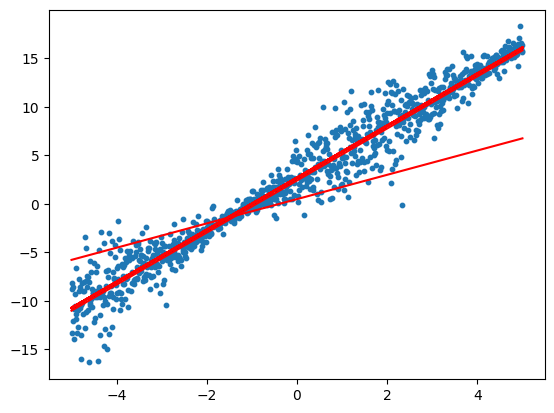

In [19]:
from matplotlib import pyplot as plt
import numpy as np

np_x = np.array(dataset_x)
np_y = np.array(dataset_y)

y_list = []

for W_i,b_i in zip(W_list,b_list):
    y_list.append(np_x * W_i + b_i)

y_list.append(np_x * W + b)

plt.scatter(np_x,np_y,s=10)

for y in y_list :
    plt.plot(np_x,y,'r')

plt.show()